In [1]:
%load_ext autoreload
%autoreload 2

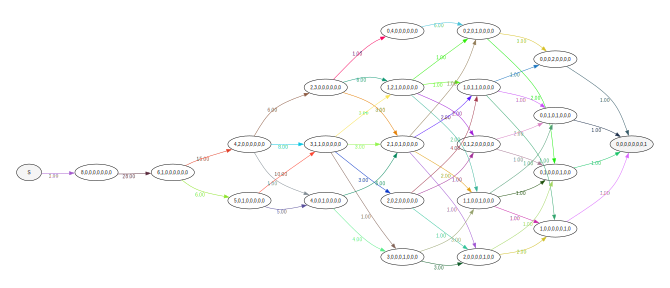

In [1]:
import pandas as pd
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import graphviz
from collections import defaultdict

import random

plt.style.use('dark_background')
import matplotlib
matplotlib.rcParams['axes.facecolor'] = '#1F1F1F'
matplotlib.rcParams['figure.facecolor'] = '#1F1F1F'

#%matplotlib widget

%config InlineBackend.figure_format = 'retina'

import ptdalgorithms as ptd


n = 8
state_vector_length = n
graph = ptd.Graph(state_vector_length)
initial_state = np.repeat(0, n)
initial_state[0] = n
vertex = graph.find_or_create_vertex(initial_state)
graph.starting_vertex().add_edge(vertex, 1)
index = 1
while index < graph.vertices_length():
    vertex = graph.vertex_at(index)
    for i in range(n):
        for j in range(i, n):
            state = vertex.state()
            if i == j:
                if state[i] < 2:
                    continue
                rate = state[i] * (state[i] - 1) / 2
            else:
                if state[i] < 1 or state[j] < 1:
                    continue
                rate = state[i] * state[j]
            child_state = state.copy()
            child_state[i] -= 1
            child_state[j] -= 1
            child_state[i+j+1] += 1
            vertex.add_edge(
                graph.find_or_create_vertex(child_state),
                weight=rate
            )
    index += 1

graph.plot( 
           # subgraphs=True, subgraphfun=lambda s, index=None: str(sum(s)//2),
           # edgecolor='black', 
           splines='curved', 
           size=(10, 4)
          )

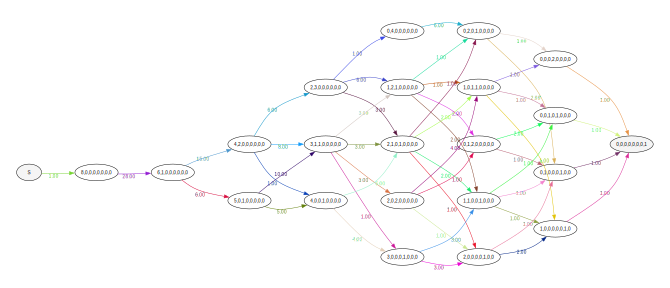

In [ ]:
def random_color():
    return '#'+''.join(random.sample('0123456789ABCDEF', 6))


def format_rate(rate):
    if rate == round(rate):
        return f"{rate:.2f}"
    else:
        return f"{rate:.2e}"


def plot_graph(graph, constraint=True, subgraphs=False, ranksep=1, 
               nodesep=0.5, splines='splines', 
               subgraphfun=lambda state, index: ','.join(map(str, state[:-1])), size=(6, 6), 
               fontsize=10, rankdir="LR", align=False, nodecolor='white', 
               edgecolor='rainbow', penwidth=1):

    graph_attr = dict(
        compound='true',
        newrank='true',
        pad='0.5',
        ranksep=str(ranksep),
        nodesep=str(nodesep),
        bgcolor='transparent',
        rankdir=rankdir,
        splines=splines,
        size=f'{size[0]},{size[1]}',
        fontname="Helvetica,Arial,sans-serif",
        ratio="fill",
    )
    node_attr = dict(
        style='filled',
        color='black',
    	fontname="Helvetica,Arial,sans-serif", 
        fontsize=str(fontsize), 
        fillcolor=str(nodecolor),
    )
    edge_attr = dict(
        constraint='true' if constraint else 'false',
        style='filled',
        labelfloat='false', 
        labeldistance='0',
    	fontname="Helvetica,Arial,sans-serif", 
        fontsize=str(fontsize), 
        penwidth=str(penwidth),
    )
    dot = graphviz.Digraph(
        graph_attr=graph_attr,
        node_attr=node_attr,
        edge_attr=edge_attr,
    )
    for i in range(graph.vertices_length()):
        vertex = graph.vertex_at(i)
        for edge in vertex.edges():
            if edgecolor == 'rainbow':
                color = random_color()
            else:
                 color = edgecolor
            dot.edge(str(vertex.index()), str(edge.to().index()), 
                   xlabel=format_rate(edge.weight()), color=color, fontcolor=color)

    subgraph_attr = dict(
        rank='same',
        style='filled',
        color='whitesmoke',
    )
    subg = defaultdict(list)
    for i in range(graph.vertices_length()):
        vertex = graph.vertex_at(i)
        if i == 0:
            dot.node(str(vertex.index()), 'S', 
                     style='filled', color='black', fillcolor='whitesmoke')
        elif not vertex.edges():
            dot.node(str(vertex.index()), ','.join(map(str, vertex.state())), 
                     style='filled', color='black',fillcolor='whitesmoke')
        elif subgraphs:
            subg[f'cluster_{subgraphfun(vertex.state())}'].append(i)
        else:
            dot.node(str(vertex.index()), ','.join(map(str, vertex.state())))
    if subgraphs:
        for sglabel in subg:
            with dot.subgraph(name=sglabel, graph_attr=subgraph_attr) as c:
                for i in subg[sglabel]:
                    vertex = graph.vertex_at(i)
                    c.node(str(vertex.index()), ','.join(map(str, vertex.state())))
    return dot

from IPython.display import display_svg
plot_graph(graph, 
           # subgraphs=True, subgraphfun=lambda s, index=None: str(sum(s)//2),
           # edgecolor='black', 
           splines='curved', 
           size=(10, 4)
          )

In [4]:
graphviz.__file__

'/Users/kmt/miniconda3/envs/ptd/lib/python3.11/site-packages/graphviz/__init__.py'

In [ ]:
display_svg()